In [1]:
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
'''
Loading the dataset
'''

dt = pd.read_csv('training_data.csv')
test = pd.read_csv('test_data.csv')

In [ ]:
print(dt.shape)

In [ ]:
corr_matrix = dt.corr()
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr_matrix,vmax=1,vmin=-1,square=True,annot=True)

In [ ]:
sns.pairplot(dt)

In [ ]:
dt.info()
dt.head()

In [ ]:
tempestim = preprocessing.KBinsDiscretizer(n_bins = 5, encode='ordinal',strategy='quantile')
dt['avg_atm_pressure'] = tempestim.fit_transform(dt[['avg_atm_pressure']])
test['avg_atm_pressure'] = tempestim.fit_transform(test[['avg_atm_pressure']])

# Feature Engineering
Since we have a lot of categorical features,we need to do feature engineering to make the models understand our dataset.

The first feature we are going to focus is the "affected_roads". This feature lists all the roads that were affected, but if we look closely we can see that most of the affected roads are repetead, and since knowing the name of the road doesn't give us much information, we are going to transform this feature to a numerical by counting the distinct number of roads that were affected.

In [ ]:
test.isna().sum()

In [3]:
from numpy import NaN


#dt.dropna(inplace=True)
dt.replace(np.NaN,0,inplace=True)

test.replace(np.NaN,0,inplace=True)

In [ ]:
test[test['affected_roads']==0]

In [ ]:
dt.isnull().sum()

In [4]:
def split_roads(x):
    if not isinstance(x['affected_roads'],int):
        return len(set(filter(None,x['affected_roads'].split(","))))
    else:
        return x['affected_roads']


In [5]:
dt['affected_roads_num'] = dt.apply(split_roads,axis=1)



In [6]:
test['affected_roads_num'] = test.apply(split_roads,axis=1)

In [ ]:
test.head()

In [ ]:
dt.head()

In [7]:
dt.drop('avg_precipitation', axis=1,inplace=True)
test.drop('avg_precipitation', axis=1,inplace=True)

In [8]:
dt.drop('affected_roads',axis=1,inplace=True)
test.drop('affected_roads',axis=1,inplace=True)
test.head()

,city_name,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,affected_roads_num
0,Guimaraes,UNDEFINED,1211,2021-04-13 19:00,LIGHT,15.0,1018.0,80.0,0.0,Sem Chuva,1
1,Guimaraes,UNDEFINED,0,2021-10-13 04:00,DARK,16.0,1018.0,41.0,2.0,Sem Chuva,1
2,Guimaraes,UNDEFINED,0,2021-07-18 19:00,LIGHT,22.0,1017.0,71.0,0.0,Sem Chuva,1
3,Guimaraes,UNDEFINED,140,2021-10-30 15:00,LIGHT,18.0,1008.0,81.0,3.0,Sem Chuva,2
4,Guimaraes,UNDEFINED,0,2021-10-18 10:00,LIGHT,20.0,1022.0,86.0,0.0,Sem Chuva,1


In [ ]:
test.tail()

The next feature we are going to focus is the city name. Let's check what are the possible city names.

In [ ]:
dt['city_name'].nunique()

Since it only has one possible value we can drop this column because it does not add much value to our model.

In [9]:
dt.drop('city_name',axis=1,inplace=True)
test.drop('city_name',axis=1,inplace=True)

Let's evaluate now the magnitude of delay feature.

In [ ]:
dt['magnitude_of_delay'].value_counts()

We have 3 possible values but the biggest value present is Undefined, this can cause bias to our model.Firstly,we will try to use one hot encoding and see the results


In [10]:
from sklearn.preprocessing import OrdinalEncoder
lb = OrdinalEncoder(categories = [['UNDEFINED','MODERATE','MAJOR']])
dt['magnitude_of_delay'] = lb.fit_transform(dt[['magnitude_of_delay']])
test['magnitude_of_delay'] = lb.fit_transform(test[['magnitude_of_delay']])

dt[1:300]

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,affected_roads_num
1,0.0,385,2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,Sem Chuva,None,1
2,0.0,69,2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,Low,0
3,2.0,2297,2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,Very_High,3
4,0.0,0,2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,High,1
5,0.0,0,2021-12-07 23:00,DARK,9.0,1015.0,94.0,0.0,Sem Chuva,Medium,1
...,...,...,...,...,...,...,...,...,...,...,...
295,0.0,0,2021-03-11 06:00,DARK,10.0,1024.0,92.0,1.0,Sem Chuva,None,0
296,2.0,1002,2021-11-09 16:00,LIGHT,19.0,1017.0,65.0,0.0,Sem Chuva,High,2
297,0.0,0,2021-11-02 02:00,DARK,11.0,1015.0,92.0,1.0,Sem Chuva,None,1
298,0.0,0,2021-05-10 22:00,DARK,9.0,1015.0,86.0,1.0,Sem Chuva,High,1


The next feature we are going to transform is the date feature.Since this is labeled as categorical, we need to transform it to the datetime format.


In [11]:
dt['record_date'] = pd.to_datetime(dt['record_date'],format='%Y-%m-%d %H:%M')
test['record_date'] = pd.to_datetime(test['record_date'],format='%Y-%m-%d %H:%M')
test.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,affected_roads_num
0,0.0,1211,2021-04-13 19:00:00,LIGHT,15.0,1018.0,80.0,0.0,Sem Chuva,1
1,0.0,0,2021-10-13 04:00:00,DARK,16.0,1018.0,41.0,2.0,Sem Chuva,1
2,0.0,0,2021-07-18 19:00:00,LIGHT,22.0,1017.0,71.0,0.0,Sem Chuva,1
3,0.0,140,2021-10-30 15:00:00,LIGHT,18.0,1008.0,81.0,3.0,Sem Chuva,2
4,0.0,0,2021-10-18 10:00:00,LIGHT,20.0,1022.0,86.0,0.0,Sem Chuva,1


In [ ]:
dt['incidents'].value_counts()

In [ ]:
dt.head()

In [12]:
from sklearn.preprocessing import OrdinalEncoder

lb_make=OrdinalEncoder(categories = [['DARK','LOW_LIGHT','LIGHT']])
dt['luminosity'] = lb_make.fit_transform(dt[['luminosity']])
test['luminosity'] = lb_make.fit_transform(test[['luminosity']])
dt.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,affected_roads_num
0,0.0,0,2021-03-15 23:00:00,0.0,12.0,1013.0,70.0,1.0,Sem Chuva,None,0
1,0.0,385,2021-12-25 18:00:00,0.0,12.0,1007.0,91.0,1.0,Sem Chuva,None,1
2,0.0,69,2021-03-12 15:00:00,2.0,14.0,1025.0,64.0,0.0,Sem Chuva,Low,0
3,2.0,2297,2021-09-29 09:00:00,2.0,15.0,1028.0,75.0,1.0,Sem Chuva,Very_High,3
4,0.0,0,2021-06-13 11:00:00,2.0,27.0,1020.0,52.0,1.0,Sem Chuva,High,1


In [ ]:
dt['avg_rain'].value_counts()

In [13]:
avg_rain_lb = OrdinalEncoder(categories=[['Sem Chuva','chuva fraca','chuva moderada','chuva forte']])
dt['avg_rain'] = avg_rain_lb.fit_transform(dt[['avg_rain']])
test['avg_rain'] = avg_rain_lb.fit_transform(test[['avg_rain']])
dt.head()


,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,affected_roads_num
0,0.0,0,2021-03-15 23:00:00,0.0,12.0,1013.0,70.0,1.0,0.0,None,0
1,0.0,385,2021-12-25 18:00:00,0.0,12.0,1007.0,91.0,1.0,0.0,None,1
2,0.0,69,2021-03-12 15:00:00,2.0,14.0,1025.0,64.0,0.0,0.0,Low,0
3,2.0,2297,2021-09-29 09:00:00,2.0,15.0,1028.0,75.0,1.0,0.0,Very_High,3
4,0.0,0,2021-06-13 11:00:00,2.0,27.0,1020.0,52.0,1.0,0.0,High,1


In [ ]:
dt['avg_rain'] =  avg_rain_lb.inverse_transform(dt['avg_rain'])
test['avg_rain'] =  avg_rain_lb.inverse_transform(test['avg_rain'])



In [ ]:
test.tail()

In [14]:
target = OrdinalEncoder(categories=[['None','Low','Medium','High','Very_High']])
dt['incidents'] = target.fit_transform(dt[['incidents']])


In [14]:
from sklearn.preprocessing import LabelEncoder
lb_incidents = LabelEncoder()
dt['incidents'] = lb_incidents.fit_transform(dt['incidents'])
dt.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,affected_roads_num
0,0.0,0,2021-03-15 23:00:00,0.0,12.0,1013.0,70.0,1.0,0.0,3,0
1,0.0,385,2021-12-25 18:00:00,0.0,12.0,1007.0,91.0,1.0,0.0,3,1
2,0.0,69,2021-03-12 15:00:00,2.0,14.0,1025.0,64.0,0.0,0.0,1,0
3,2.0,2297,2021-09-29 09:00:00,2.0,15.0,1028.0,75.0,1.0,0.0,4,3
4,0.0,0,2021-06-13 11:00:00,2.0,27.0,1020.0,52.0,1.0,0.0,0,1


In [ ]:
from sklearn.preprocessing import OneHotEncoder
lb = OneHotEncoder()
encoded_train = lb.fit_transform(dt[['magnitude_of_delay']])
encoded_test = lb.fit_transform(test[['magnitude_of_delay']])
dt[lb.categories_[0]] = encoded_train.toarray()
test[lb.categories_[0]] = encoded_test.toarray()

dt.drop('magnitude_of_delay',axis=1,inplace=True)
test.drop('magnitude_of_delay',axis=1,inplace=True)
dt[1:300]

In [15]:
dt['day'] = dt['record_date'].dt.day
dt['month'] = dt['record_date'].dt.month
dt['hour'] = dt['record_date'].dt.hour

test['day'] = test['record_date'].dt.day
test['month'] = test['record_date'].dt.month
test['hour'] = test['record_date'].dt.hour


In [16]:
dt.drop('record_date',axis=1,inplace=True)
test.drop('record_date',axis=1,inplace=True)

In [17]:
X_train = dt.drop(['incidents'],axis=1)
y_train = dt['incidents'].to_frame()


In [ ]:
from sklearn.svm import SVC
model = SVC(random_state=2022,probability=False)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=2022)
#model.fit(X_train,y_train)

In [ ]:
predicts = model.predict(test)
test['incidents'] = predicts
test.head()

In [ ]:
params_grid = {'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel' : ['rbf']}

In [ ]:
from sklearn.model_selection import GridSearchCV, ParameterGrid
svm_model = GridSearchCV(model,params_grid,cv=5,n_jobs=-1,refit=True,verbose=3)


In [ ]:
svm_model.fit(X_train,y_train.values.ravel())

In [ ]:
svm_model.best_score_

In [ ]:
param_grid = { 
    'n_estimators': [100,200,500,1000],
    'max_features': ['sqrt', 'log2','None'],
    'max_depth' : range(13,17),
    'criterion' :['gini', 'entropy'],
    "min_samples_split": range(1,4),
    "min_samples_leaf": range(1,5)
}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

random_model = RandomForestClassifier(random_state=2022)

randomForest = GridSearchCV(random_model, param_grid = param_grid, n_jobs = -1, cv = 10,verbose=3)
randomForest.fit(X_train,y_train.values.ravel())

In [ ]:
randomForest.best_params_


In [ ]:
from sklearn.ensemble import RandomForestClassifier
bestModel = RandomForestClassifier(random_state=2022, criterion='entropy',max_depth=14,min_samples_leaf=1,min_samples_split=2,n_estimators=100,max_features='sqrt')
bestModel.fit(X_train,y_train.values.ravel())

In [ ]:
predicts = bestModel.predict(test)
test['incidents'] = predicts

In [ ]:
from sklearn.model_selection import GridSearchCV, ParameterGrid


#mean_absolute_error(y_test, predictions)
#mean_squared_error(y_test,predictions)
param_dict={
    "criterion":['gini','entropy'],
    "max_depth":range(1,20),
    "min_samples_split":range(1,20),
    "min_samples_leaf":range(1,20)
}
gs = GridSearchCV(model, param_grid = param_dict,n_jobs=-1,cv=10,scoring='accuracy',verbose=1)
gs.fit(X_train,y_train)


In [ ]:
gs.best_params_
gs.best_estimator_
#gs.best_score_

In [ ]:
best_model=DecisionTreeClassifier(random_state=2022,criterion='entropy',max_depth=13,min_samples_leaf=3,min_samples_split=8)
best_model.fit(X_train,y_train)

In [34]:
predicts = best_model.predict(test)
test['incidents'] = predicts

38/38 [==============================] - 0s 1ms/step


In [ ]:
dt.info()

# MLP

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.preprocessing import MinMaxScaler




2022-11-10 23:52:15.312395: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-10 23:52:15.475335: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-10 23:52:15.475356: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-10 23:52:15.516811: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-10 23:52:16.421122: W tensorflow/stream_executor/platform/de

In [19]:
scaler_X = MinMaxScaler(feature_range=(0,1)).fit(X_train)
#scaler_y = MinMaxScaler(feature_range=(0,1)).fit(y_train)
X_scaled = pd.DataFrame(scaler_X.transform(X_train[X_train.columns]),columns=X_train.columns)
#Y_scaled = pd.DataFrame(scaler_y.transform(y_train[y_train.columns]),columns=y_train.columns)
scaler_test = MinMaxScaler(feature_range=(0,1)).fit(test)
test_scaled = pd.DataFrame(scaler_test.transform(test[test.columns]),columns=test.columns)


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_train, test_size=0.25, random_state=2022)

In [28]:
def build_model(activation = 'relu', learning_rate = 0.01):
    model = Sequential()
    model.add(Dense(12, input_dim=12,activation = activation))
    model.add(Dense(16, activation = activation))
    model.add(Dense(5, activation = 'softmax'))
    
    model.compile(
        loss = tf.keras.losses.SparseCategoricalCrossentropy(),
        optimizer = tf.optimizers.RMSprop(learning_rate),
        metrics = ['accuracy','sparse_categorical_accuracy']
    )
    return model

In [22]:
tuning_dict = {
    'activation' : ['relu','sigmoid'],
    'learning_rate' : [0.1,0.01,0.001]
}

In [29]:
kf = KFold(n_splits=10, shuffle=True, random_state=2022)
model = KerasClassifier(build_fn=build_model, epochs = 40, batch_size=64)
grid_search = GridSearchCV(estimator = model,
                           param_grid= tuning_dict,
                           cv = kf,
                           scoring='accuracy',
                           refit = True,
                           verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
Epoch 1/40


/tmp/ipykernel_119945/329691044.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=build_model, epochs = 40, batch_size=64)


53/53 [==============================] - 1s 2ms/step - loss: 1.6211 - accuracy: 0.3793 - sparse_categorical_accuracy: 0.3793
Epoch 2/40
53/53 [==============================] - 0s 2ms/step - loss: 1.3845 - accuracy: 0.4412 - sparse_categorical_accuracy: 0.4412
Epoch 3/40
53/53 [==============================] - 0s 2ms/step - loss: 1.2376 - accuracy: 0.5070 - sparse_categorical_accuracy: 0.5070
Epoch 4/40
53/53 [==============================] - 0s 2ms/step - loss: 1.1745 - accuracy: 0.5345 - sparse_categorical_accuracy: 0.5345
Epoch 5/40
53/53 [==============================] - 0s 2ms/step - loss: 1.1637 - accuracy: 0.5520 - sparse_categorical_accuracy: 0.5520
Epoch 6/40
53/53 [==============================] - 0s 2ms/step - loss: 1.1418 - accuracy: 0.5502 - sparse_categorical_accuracy: 0.5502
Epoch 7/40
53/53 [==============================] - 0s 2ms/step - loss: 1.1243 - accuracy: 0.5683 - sparse_categorical_accuracy: 0.5683
Epoch 8/40
53/53 [==============================] - 0s 2ms/

GridSearchCV(cv=KFold(n_splits=10, random_state=2022, shuffle=True),
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7fea643e81c0>,
             param_grid={'activation': ['relu', 'sigmoid'],
                         'learning_rate': [0.1, 0.01, 0.001]},
             scoring='accuracy', verbose=1)

In [30]:
print(grid_search.best_score_)

0.7589333333333335


In [31]:
best_model = grid_search.best_estimator_

In [27]:
best_model.fit(X_scaled,y_train,epochs=20)

Epoch 1/20
125/125 [==============================] - 1s 2ms/step - loss: 1.2007 - accuracy: 0.5024 - sparse_categorical_accuracy: 0.5024
Epoch 2/20
125/125 [==============================] - 0s 2ms/step - loss: 0.9878 - accuracy: 0.6198 - sparse_categorical_accuracy: 0.6198
Epoch 3/20
125/125 [==============================] - 0s 2ms/step - loss: 0.8996 - accuracy: 0.6516 - sparse_categorical_accuracy: 0.6516
Epoch 4/20
125/125 [==============================] - 0s 2ms/step - loss: 0.8344 - accuracy: 0.6750 - sparse_categorical_accuracy: 0.6750
Epoch 5/20
125/125 [==============================] - 0s 2ms/step - loss: 0.8003 - accuracy: 0.6856 - sparse_categorical_accuracy: 0.6856
Epoch 6/20
125/125 [==============================] - 0s 2ms/step - loss: 0.7660 - accuracy: 0.7016 - sparse_categorical_accuracy: 0.7016
Epoch 7/20
125/125 [==============================] - 0s 2ms/step - loss: 0.7405 - accuracy: 0.7106 - sparse_categorical_accuracy: 0.7106
Epoch 8/20
125/125 [==============

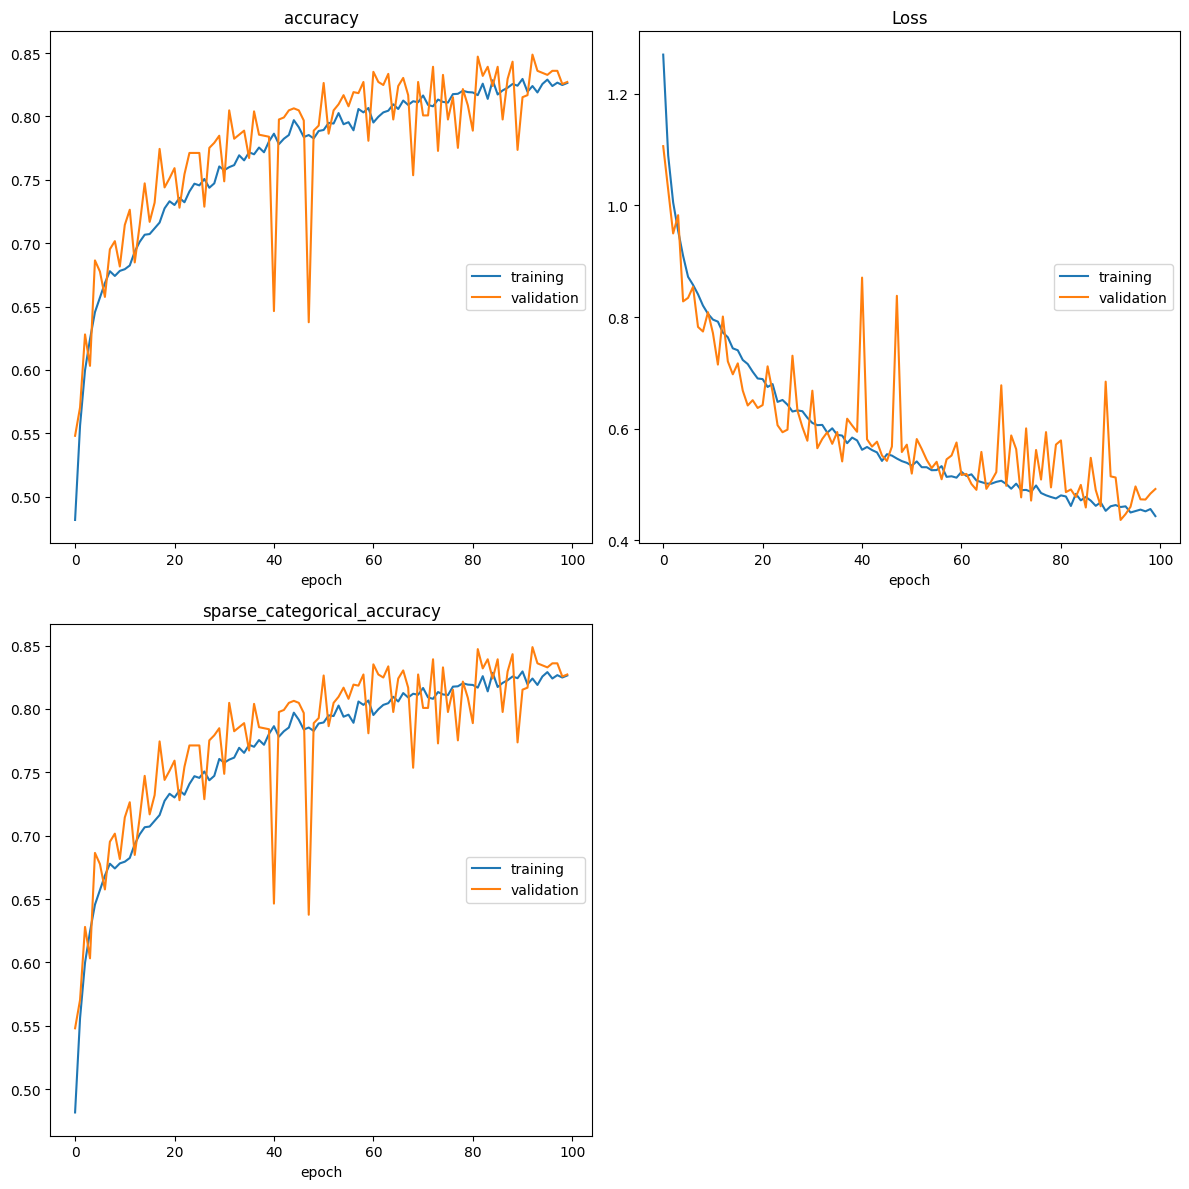

accuracy
	training         	 (min:    0.482, max:    0.830, cur:    0.826)
	validation       	 (min:    0.548, max:    0.849, cur:    0.827)
Loss
	training         	 (min:    0.443, max:    1.270, cur:    0.443)
	validation       	 (min:    0.436, max:    1.106, cur:    0.492)
sparse_categorical_accuracy
	training         	 (min:    0.482, max:    0.830, cur:    0.826)
	validation       	 (min:    0.548, max:    0.849, cur:    0.827)
59/59 [==============================] - 1s 14ms/step - loss: 0.4432 - accuracy: 0.8264 - sparse_categorical_accuracy: 0.8264 - val_loss: 0.4919 - val_accuracy: 0.8272 - val_sparse_categorical_accuracy: 0.8272


In [34]:
from livelossplot import PlotLossesKerasTF

best_model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=100,callbacks=[PlotLossesKerasTF()],verbose=1)


In [28]:
predictions = best_model.predict(test_scaled)


38/38 [==============================] - 0s 2ms/step


In [29]:
print(predictions)

[4. 0. 0. ... 3. 1. 3.]


In [32]:
y_test_unscaled = pd.DataFrame(scaler_test.inverse_transform(test_scaled))

In [33]:
y_test_unscaled['incidents'] = predictions

In [34]:
print(y_test_unscaled)

        0       1    2     3       4     5    6    7    8     9    10    11  \
0     0.0  1211.0  2.0  15.0  1018.0  80.0  0.0  0.0  1.0  13.0   4.0  19.0   
1     0.0     0.0  0.0  16.0  1018.0  41.0  2.0  0.0  1.0  13.0  10.0   4.0   
2     0.0     0.0  2.0  22.0  1017.0  71.0  0.0  0.0  1.0  18.0   7.0  19.0   
3     0.0   140.0  2.0  18.0  1008.0  81.0  3.0  0.0  2.0  30.0  10.0  15.0   
4     0.0     0.0  2.0  20.0  1022.0  86.0  0.0  0.0  1.0  18.0  10.0  10.0   
...   ...     ...  ...   ...     ...   ...  ...  ...  ...   ...   ...   ...   
1201  0.0     0.0  2.0  12.0  1025.0  70.0  2.0  0.0  1.0  31.0  12.0  10.0   
1202  0.0    44.0  0.0  24.0  1016.0  39.0  2.0  0.0  1.0  16.0   7.0   0.0   
1203  2.0  1261.0  2.0  13.0  1018.0  60.0  0.0  0.0  1.0  19.0  12.0  15.0   
1204  0.0   246.0  2.0  15.0  1015.0  50.0  1.0  0.0  0.0   8.0   3.0  17.0   
1205  0.0     0.0  2.0  19.0  1022.0  45.0  1.0  0.0  1.0   6.0   6.0  10.0   

      incidents  
0           4.0  
1           0.0

In [35]:
test = y_test_unscaled

# Building the output file


In [36]:
test['incidents'] =  target.inverse_transform(test[['incidents']])

In [37]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206 entries, 0 to 1205
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   0          1206 non-null   float64
 1   1          1206 non-null   float64
 2   2          1206 non-null   float64
 3   3          1206 non-null   float64
 4   4          1206 non-null   float64
 5   5          1206 non-null   float64
 6   6          1206 non-null   float64
 7   7          1206 non-null   float64
 8   8          1206 non-null   float64
 9   9          1206 non-null   float64
 10  10         1206 non-null   float64
 11  11         1206 non-null   float64
 12  incidents  1206 non-null   object 
dtypes: float64(12), object(1)
memory usage: 122.6+ KB


In [38]:
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,incidents
0,0.0,1211.0,2.0,15.0,1018.0,80.0,0.0,0.0,1.0,13.0,4.0,19.0,Very_High
1,0.0,0.0,0.0,16.0,1018.0,41.0,2.0,0.0,1.0,13.0,10.0,4.0,None
2,0.0,0.0,2.0,22.0,1017.0,71.0,0.0,0.0,1.0,18.0,7.0,19.0,None
3,0.0,140.0,2.0,18.0,1008.0,81.0,3.0,0.0,2.0,30.0,10.0,15.0,Low
4,0.0,0.0,2.0,20.0,1022.0,86.0,0.0,0.0,1.0,18.0,10.0,10.0,None


In [39]:
test.index +=1
test.reset_index(drop=False,inplace=True)

final_csv = test.to_csv(r'final.csv',header=["RowId","Incidents"],columns=['index','incidents'],index=False)

In [ ]:
test.tail()